# Encoding face features

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import dlib
from faceparsing.parser import FaceParser
from imagine.color import extract
from automakeup import dlib_predictor_path
from automakeup.face import face_extraction, bounding
from automakeup.feature import feature_extraction
from imagine.color.conversion import BgrToRgb
from importlib import resources
from mtcnn import MTCNN
from facenet import Facenet

In [2]:
img_path = "face.jpg"

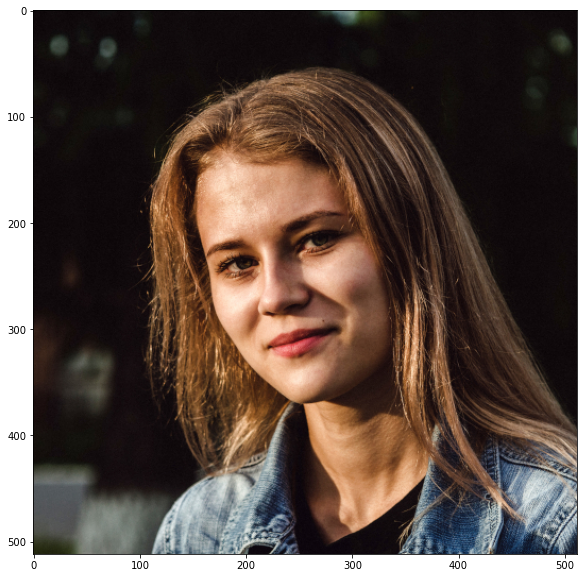

In [3]:
image = BgrToRgb(cv2.imread(img_path))
plt.figure(figsize=(10,10))
plt.imshow(image)

In [4]:
mtcnn = MTCNN()
bb_finder = bounding.MTCNNBoundingBoxFinder(mtcnn)

### Color encoding

In [5]:
face_extractor = face_extraction.SimpleFaceExtractor(512)

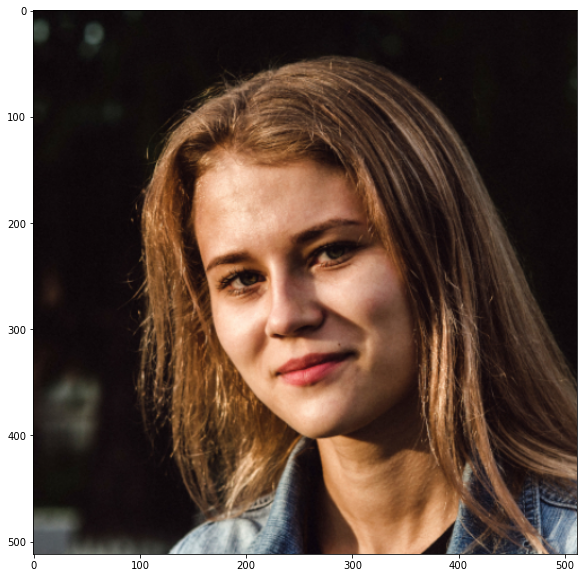

In [6]:
bb = bb_finder.find(image)
face = face_extractor.extract(image, bb)
plt.figure(figsize=(10,10))
plt.imshow(face)

In [7]:
parser = FaceParser()

In [8]:
color_extractor = extract.MedianColorExtractor()
feautre_extractor = feature_extraction.ColorsFeatureExtractor(parser, color_extractor)

In [9]:
features = feautre_extractor(face)
features

array([191, 139, 111,  80,  55,  40, 153,  62,  58,  50,  36,  25],
      dtype=uint8)

### Facenet encoding

In [10]:
with dlib_predictor_path() as p:
    predictor = dlib.shape_predictor(str(p))

In [11]:
face_extractor = face_extraction.AligningDlibFaceExtractor(512, predictor)

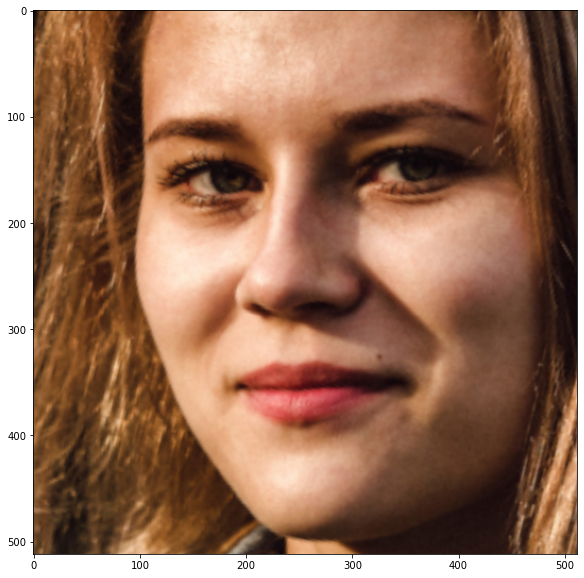

In [12]:
bb = bb_finder.find(image)
face = face_extractor.extract(image, bb)
plt.figure(figsize=(10,10))
plt.imshow(face)

In [13]:
facenet = Facenet()
feature_extractor = feature_extraction.FacenetFeatureExtractor(facenet)

In [14]:
features = feature_extractor(face)
features

array([-5.24055846e-02, -2.47073863e-02, -7.65398741e-02, -1.06552038e-02,
        6.89874440e-02, -1.36695020e-02,  9.41798277e-03,  2.80875377e-02,
        5.10483533e-02, -3.59959081e-02, -4.12089266e-02,  7.32945204e-02,
        2.04919502e-02, -5.22576049e-02,  2.38127559e-02,  1.55307008e-02,
        5.37665375e-02,  2.79512424e-02,  1.68222282e-02, -7.60167316e-02,
       -4.20499183e-02, -1.78462788e-02,  1.07169367e-01, -4.96066455e-03,
       -1.07669190e-03, -1.54069597e-02, -5.44985756e-04, -8.07493553e-02,
       -2.90725250e-02,  7.68276602e-02, -2.80436277e-02, -3.23131159e-02,
       -5.45941740e-02, -5.10330386e-02, -2.69411169e-02,  5.49094006e-03,
        3.29947919e-02, -2.63726357e-02, -1.13451935e-01,  8.28258768e-02,
        2.81558279e-03,  1.01967296e-02, -5.22107929e-02,  6.70753419e-02,
        9.44124348e-03,  6.78697194e-04,  4.94291075e-02,  7.65340179e-02,
       -1.23165376e-01, -3.80667150e-02, -5.30858412e-02,  3.38409692e-02,
        2.15327758e-02,  